<a href="https://colab.research.google.com/github/Sharishmaadabala/hackthon-projects/blob/main/project_of_AI_medical_diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision tensorflow opencv-python matplotlib scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, Dataset
import torchvision.models as models

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cv2
from sklearn.model_selection import train_test_split


In [3]:
! pip install opendatasets

In [5]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/alifrahman/covid19-chest-xray-image-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sharishmaadabala
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/alifrahman/covid19-chest-xray-image-dataset


100%|██████████| 40.6M/40.6M [00:00<00:00, 75.9MB/s]


In [9]:
import os
import pandas as pd

# Define dataset directory
data_dir = "/content/covid19-chest-xray-image-dataset"

# Lists to store image paths and labels
image_paths = []
labels = []

# Loop through each folder (COVID, NORMAL, PNEUMONIA, etc.)
for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)

    if os.path.isdir(class_path):  # Ensure it's a folder
        for img_name in os.listdir(class_path):
            image_paths.append(os.path.join(class_name, img_name))  # Relative path
            labels.append(class_name)  # Class label

# Create DataFrame
df = pd.DataFrame({'image_path': image_paths, 'label': labels})

# Save to CSV
csv_path = "/content/covid19_dataset.csv"
df.to_csv(csv_path, index=False)

print(f"✅ CSV file saved: {csv_path}")


✅ CSV file saved: /content/covid19_dataset.csv


In [10]:
from google.colab import files
files.download(csv_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to fit pre-trained models
    transforms.RandomRotation(10),  # Data augmentation (optional)
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Normalize for ResNet/EfficientNet
])


In [17]:
data_dir = "/content/covid19-chest-xray-image-dataset"

dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Split dataset into train (80%) and test (20%)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
model = models.efficientnet_b0(pretrained=True)
num_ftrs = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_ftrs, 2)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)




/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 132MB/s] 


In [21]:
label_map = {"COVID": 0, "NORMAL": 1, "PNEUMONIA": 2}
idx_to_class = {v: k for k, v in label_map.items()}  # Reverse mapping


In [23]:
dataset = datasets.ImageFolder(root=data_dir, transform=transform)


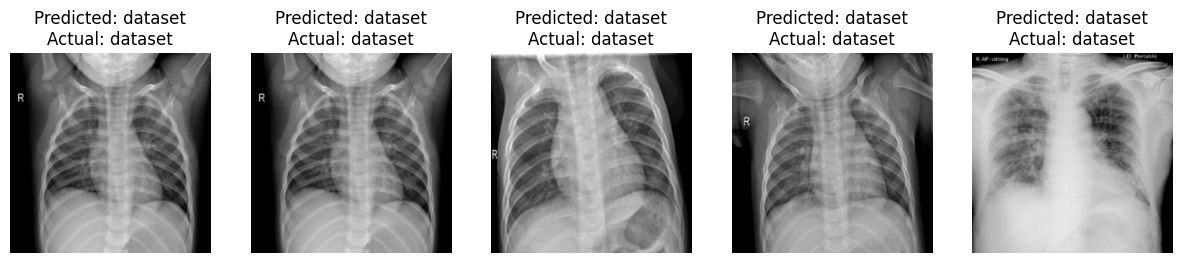

In [25]:
import torch
import random
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Define dataset path
data_dir = "/content/covid19-chest-xray-image-dataset"

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Load dataset
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Store class names before splitting
class_names = dataset.classes  # ['COVID', 'NORMAL', 'PNEUMONIA']

# Split dataset into train (80%) and test (20%)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Function to show sample predictions
def show_sample_predictions(model, dataset, class_names, num_samples=5):
    model.eval()
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

    for i in range(num_samples):
        idx = random.randint(0, len(dataset) - 1)
        img, label = dataset[idx]  # Get image and label
        img = img.unsqueeze(0).to(device)  # Move to GPU/CPU

        with torch.no_grad():
            output = model(img)
            _, predicted = torch.max(output, 1)  # Get predicted index

        # Convert to NumPy for display
        img = img.cpu().squeeze().permute(1, 2, 0).numpy()

        # Use `class_names` instead of `dataset.classes`
        predicted_class = class_names[int(predicted.item())]
        actual_class = class_names[int(label)]

        axes[i].imshow(img, cmap="gray")
        axes[i].set_title(f"Predicted: {predicted_class}\nActual: {actual_class}")
        axes[i].axis("off")

    plt.show()

# Show sample predictions (pass `class_names` explicitly)
show_sample_predictions(model, test_dataset, class_names)


In [27]:
torch.save(model.state_dict(), "xray_classification_model.pth")
model.load_state_dict(torch.load("xray_classification_model.pth"))
model.eval()


<ipython-input-27-64f19a339f77>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("xray_classification_model.pth"))


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat